In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/stocks.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,04-01-2010,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,05-01-2010,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,06-01-2010,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,07-01-2010,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,08-01-2010,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0


In [ ]:
df.drop(columns=['Date'],axis=1,inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0


In [ ]:
missing_rows = df.isnull().sum(axis=1)
for i in range( len(missing_rows)):
  if( missing_rows[i] == 6 ):
    print( "row "+str(i)+" missing")

row 24 missing
row 340 missing
row 370 missing
row 453 missing
row 474 missing
row 479 missing
row 484 missing
row 521 missing
row 571 missing
row 638 missing
row 647 missing
row 687 missing
row 718 missing
row 956 missing
row 989 missing
row 1010 missing
row 1031 missing
row 1144 missing
row 1193 missing
row 1231 missing
row 1258 missing
row 1430 missing
row 1576 missing
row 1904 missing
row 2142 missing
row 2332 missing
row 2586 missing


In [ ]:
df.isnull().sum()

Open         27
High         27
Low          27
Close        27
Adj Close    27
Volume       27
dtype: int64

In [ ]:
df=df.interpolate()

In [ ]:
## Testing on foreign data
## 2 days model
## Submission format

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:

from sklearn.preprocessing import MinMaxScaler

In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0        5232.200195
1        5277.899902
2        5281.799805
3        5263.100098
4        5244.750000
            ...     
2689    14485.000000
2690    14653.049810
2691    14864.549810
2692    14894.900390
2693    14631.099610
Name: Close, Length: 2694, dtype: float64

In [ ]:
scaled=MinMaxScaler(feature_range=(0,1))
df1=scaled.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.06387819],
       [0.06812123],
       [0.06848332],
       ...,
       [0.95820525],
       [0.96102318],
       [0.93653028]])

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.9)#70% of data will be used for training the model
test_size=len(df1)-training_size
train_data=df1[0:training_size,:]
# test_data=df1[training_size-50:len(df1),:1]

In [ ]:

train_data[80:82]

array([[0.05391576],
       [0.05075437]])

In [ ]:
#datastruct with 50 time-steps and 2 output
x_train=[]
y_train=[]

for i in range(50, train_data.shape[0]):
	x_train.append(train_data[i-50:i,0]), y_train.append(train_data[i,0])

x_train, y_train= np.array(x_train), np.array(y_train)

In [ ]:
x_train.dtype


dtype('float64')

In [ ]:
y_train.shape

NameError: ignored

In [ ]:
print(x_train.shape)
print(x_train.dtype)
print(y_train.shape)
print(y_train.dtype)


(2374, 50)
float64
(2374,)
float64


In [ ]:
## ML model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model=Sequential()
model.add(LSTM(units=100, return_sequences= True, input_shape=(x_train.shape[1],1)))

model.add(LSTM(units=80, return_sequences= True ))

# model.add(LSTM(units=60, return_sequences= True ))

model.add(LSTM(units=60))


model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_109 (LSTM)             (None, 50, 100)           40800     
                                                                 
 lstm_110 (LSTM)             (None, 50, 80)            57920     
                                                                 
 lstm_111 (LSTM)             (None, 60)                33840     
                                                                 
 dense_27 (Dense)            (None, 1)                 61        
                                                                 
Total params: 132,621
Trainable params: 132,621
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size = 64, validation_data = (x_train, y_train))

Epoch 1/50
38/38 [==============================] - 18s 325ms/step - loss: 0.0122 - val_loss: 5.8379e-04
Epoch 2/50
38/38 [==============================] - 11s 289ms/step - loss: 5.5356e-04 - val_loss: 4.0914e-04
Epoch 3/50
38/38 [==============================] - 11s 292ms/step - loss: 4.1025e-04 - val_loss: 4.0269e-04
Epoch 4/50
38/38 [==============================] - 14s 384ms/step - loss: 4.2556e-04 - val_loss: 4.4367e-04
Epoch 5/50
38/38 [==============================] - 11s 292ms/step - loss: 4.8527e-04 - val_loss: 3.8099e-04
Epoch 6/50
38/38 [==============================] - 11s 289ms/step - loss: 3.9288e-04 - val_loss: 4.6351e-04
Epoch 7/50
38/38 [==============================] - 13s 338ms/step - loss: 4.1046e-04 - val_loss: 4.2460e-04
Epoch 8/50
38/38 [==============================] - 12s 323ms/step - loss: 4.0414e-04 - val_loss: 3.9474e-04
Epoch 9/50
38/38 [==============================] - 12s 325ms/step - loss: 3.6089e-04 - val_loss: 3.7552e-04
Epoch 10/50
38/38 [====

In [ ]:
model.save("model_gorigand.h5")

In [ ]:
# test_data.shape

In [ ]:
#test
x_test=[]
y_test=[]

for i in range(50, len(test_data)):
  x_test.append(test_data[i-50:i]), y_test.append(test_data[i])

In [ ]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
#x_test.shape

In [ ]:
y_predicted=model.predict(x_test)

9/9 [==============================] - 2s 50ms/step


In [ ]:
y_predicted.shape

(270, 1)

In [ ]:
y_test.shape

(270, 1)

In [ ]:
y_predicted = scaled.inverse_transform(y_predicted)

In [ ]:
y_test = scaled.inverse_transform(y_test)

In [ ]:
error_array = y_test - y_predicted
#error_array

In [ ]:
error = 0
for i in range( len(error_array)):
  error += (error_array[i]**2)

In [ ]:
error = error/(len(error_array))
error


array([68952.72184357])

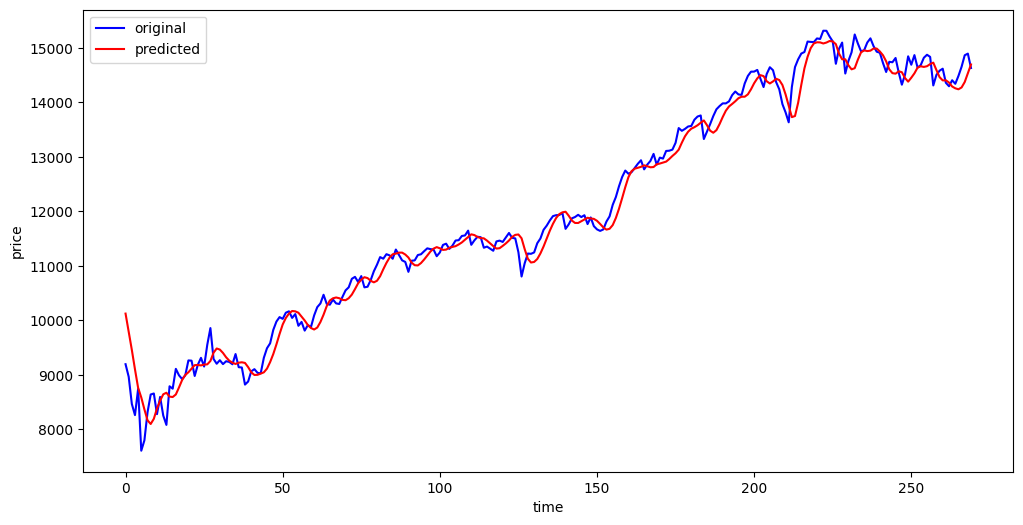

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='original')
plt.plot(y_predicted, 'r', label='predicted')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
sample_input = pd.read_csv('/content/sample_input.csv')
sample_input.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-03,6264.350098,6277.750000,6212.250000,6221.450195,6221.450195,144600.0
1,2014-03-04,6216.750000,6302.149902,6215.700195,6297.950195,6297.950195,166800.0
2,2014-03-07,6413.950195,6537.799805,6413.549805,6526.649902,6526.649902,284900.0
3,2014-03-10,6491.700195,6562.200195,6487.350098,6537.250000,6537.250000,242100.0
4,2014-03-11,6537.350098,6562.850098,6494.250000,6511.899902,6511.899902,239000.0


In [ ]:
sample_input = sample_input.interpolate()
sample_input.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
sample_close = sample_input['Adj Close']
sample_close=scaled.fit_transform(np.array(sample_close).reshape(-1,1))

In [ ]:
sample_x = []
sample_x.append( sample_close[0:50])

In [ ]:
sample_x = np.array(sample_x)

In [ ]:
sample_x.shape

(1, 50, 1)

In [ ]:
my_prediction = model.predict(sample_x)

1/1 [==============================] - 0s 48ms/step


In [ ]:
my_prediction = scaled.inverse_transform(my_prediction)

In [ ]:
my_prediction

array([[7234.0386]], dtype=float32)

In [ ]:

actual_close = 7232.200195
pred_close = 7234.0386
mean_square_error = np.mean(np.square(actual_close-pred_close))
print(f'Mean Square Error: {mean_square_error:.6f}')

Mean Square Error: 3.379733


In [ ]:
np.sqrt(mean_square_error)


9.30719500000032